<a href="https://colab.research.google.com/github/Jakhongir0103/ML_learning/blob/main/Diabet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements. All patients in the dataset are women at least 21 years old.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
%matplotlib inline

In [155]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [157]:
df.Outcome.value_counts()
# 0 - no diabet found
# 1 - diabet found

0    500
1    268
Name: Outcome, dtype: int64

In [158]:
df.drop(index=df[df.Outcome == 0].iloc[:200].index, inplace=True)   # we drop some of the data with Outcome=0 to balance both Negative and Positive sides

In [159]:
pd.DataFrame(df.corrwith(df.Outcome).sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')

,0
Outcome,1.000000
Glucose,0.493950
BMI,0.303621
Pregnancies,0.236914
Age,0.235373
DiabetesPedigreeFunction,0.160386
Insulin,0.136308
SkinThickness,0.079881
BloodPressure,0.069328


In [160]:
df = df.drop(columns=['BloodPressure', 'SkinThickness'])   # we drop the columns "BloodPressure" "SkinThickness" as they have very low correlation

### Test Train Sets

In [161]:
y = df[['Outcome']]
x = df.drop(columns=['Outcome'])

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=21)

knn_model = knn_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [164]:
y_predict = knn_model.predict(x_test)

### Jaccard indexing evaluation

In [165]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.6

### Confusion matrix evaluation

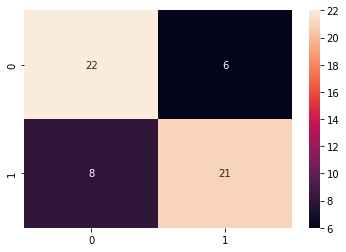

In [166]:
from sklearn.metrics import confusion_matrix
sn.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.78      0.72      0.75        29

    accuracy                           0.75        57
   macro avg       0.76      0.75      0.75        57
weighted avg       0.76      0.75      0.75        57



### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_predict
cv_predict = cross_val_predict(estimator=knn_model, X=x, y=y, cv=5)

In [169]:
print(classification_report(y, cv_predict))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       300
           1       0.73      0.74      0.74       268

    accuracy                           0.75       568
   macro avg       0.75      0.75      0.75       568
weighted avg       0.75      0.75      0.75       568



### Selecting the best k

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_model, {'n_neighbors': np.arange(1,40)}, cv=5)

knn_gscv.fit(x,y)

In [173]:
knn_gscv.best_params_

{'n_neighbors': 21}

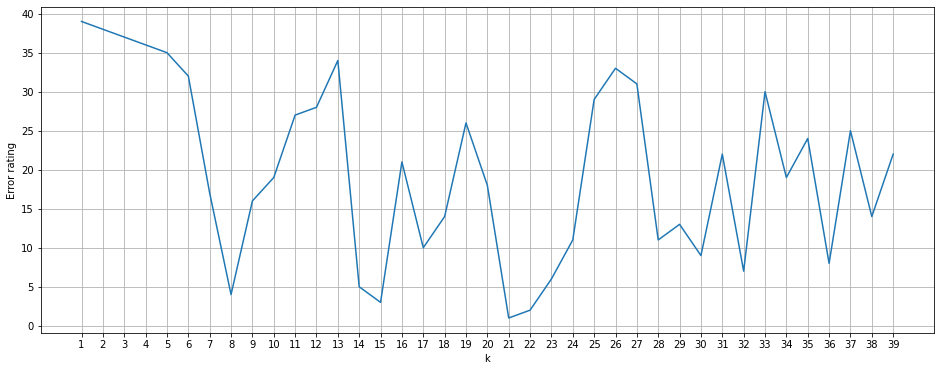

In [172]:
plt.figure(figsize=(16,6))
plt.plot(np.arange(1,40), knn_gscv.cv_results_['rank_test_score'])
plt.xticks(np.arange(1,40))
plt.xlabel("k")
plt.ylabel("Error rating")
plt.grid()
plt.show()